### Выбираем датасет, подключаем и изучаем его

In [1]:
# Подключаем библиотеки numpy и pandas

import numpy as np
import pandas as pd

In [2]:
# Считываем csv файл с данными про открытие планет

df_planets = pd.read_csv(r"D:\Innopolis-2024\Planets.csv")

In [3]:
# Поссмотрим как выглядит табличка, увидим столбцы Метод открытия, номер (не понятно для чего), 
# орбитальный период, масса, дистанция в световых годах, год открытия

df_planets.describe()

NameError: name 'df_planets' is not defined

In [4]:
# Рассмотрим какие методы открытия планет есть в таблице

df_planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [5]:
# Рассмотрим статистику по столбцу Год открытия

df_planets['year'].describe()

count    1035.000000
mean     2009.070531
std         3.972567
min      1989.000000
25%      2007.000000
50%      2010.000000
75%      2012.000000
max      2014.000000
Name: year, dtype: float64

In [6]:
# Рассчитаем количество строк и столбцов в датафрейме Planets

df_planets.shape

(1035, 6)

### Делим датасет на 2 части и собираем обратно

In [7]:
# Создаем новый датафрейм, который является частью датафрейма Planets, с открытиями планет, которые произошли ранее 2009 года включительно
# Расчитываем количество строк и столбцов

df_pl_1 = df_planets.loc[df_planets['year'] <= 2009]
df_pl_1.shape

(438, 6)

In [8]:
# Создаем новый датафрейм, который является частью датафрейма Planets, с открытиями планет, которые произошли позднее 2009 года
# Расчитываем количество строк и столбцов

df_pl_2 = df_planets.loc[df_planets['year'] > 2009]
df_pl_2.shape

(597, 6)

In [9]:
# Проверяем схожесть столбцов двух новых датафреймов

df_pl_1.columns == df_pl_2.columns

array([ True,  True,  True,  True,  True,  True])

In [10]:
# Соединяем два новых датафрейма обратно в один целый и сразу же сортируем по индексу

pd.concat([df_pl_1, df_pl_2]).sort_index()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### Проверим, есть ли в датасете дубликаты, если есть удалим

In [11]:
# Проверяем, есть ли в датасете дубликаты строк

df_planets[df_planets.duplicated()]

,method,number,orbital_period,mass,distance,year
903,Microlensing,1,NaN,NaN,NaN,2008
923,Microlensing,1,NaN,NaN,NaN,2009
926,Microlensing,2,NaN,NaN,4080.0,2012
957,Imaging,1,NaN,NaN,NaN,2008


In [12]:
# Дубликаты бы сути быть не должны, одну планету не могут 2 раза найти, если бы только разным методом.
# Дубликаты образовались по причине того, что отсутствует некоторые записи в строках, а по оставшимся есть соответственно подобные строки
# Удаляем найденные 4 дубликата, создаем новый датасет без дубликатов (в нем останется 1035-4=1031 строк)

df_planets_unique = df_planets.drop_duplicates()
df_planets_unique.shape

(1031, 6)

### Проверим, есть ли в датасете пропуски

In [13]:
# Проверяем количество пропуском в датасете по столбцам

df_planets.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

### Заполним пропуски

In [14]:
size_na = df_planets['mass'].isna().sum()     # Считаем количество строк с пустыми массами

# random_mass = df_planets['mass'].dropna().sample(size_na).values
# вот эта штука не сработает, потому что пустых строк получается больше, чем непустых, брать рандомные неоткуда, вылазит ошибка

min_mass = df_planets['mass'].min()     # Находим минимальную массу
max_mass = df_planets['mass'].max()     # Находим максимальную массу
random_mass = np.random.uniform(min_mass, max_mass, size_na)     # Создаем массив из нужного количества случайных чисел в диапазоне от min до max
df_planets.loc[df_planets['mass'].isna(), 'mass'] = random_mass     # Присваиваем пустым значениям в столбце Масса значения массива случайных чисел
df_planets.isna().sum()     # В итоге все значения в столбце Масса заполнены

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

### Проверяем выбросы

In [15]:
# Выбросы интереснее искать не по массе, а по дистации, так как массы планет в масштабах галактик очень сильно различаться не будут.
# Возьмем метод через IQR

q1 = df_planets['distance'].quantile(0.25)
q3 = df_planets['distance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f"Выбросами будут считаться все растояния, значения которых находится за пределами интервала [{lower_bound}, {upper_bound}]")

Выбросами будут считаться все растояния, значения которых находится за пределами интервала [-186.35, 397.40999999999997]


In [16]:
# Поссмотрим сколько будет выбросов за пределами верхнего интервала. Снизу не будет, расстояние отрицательное не бывает

df_planets[df_planets['distance'] >= upper_bound].shape

(108, 6)

In [17]:
# Удаляем выбросы и не забываем дописать строки с пустой дистанцией

df_planets[((df_planets['distance'] >= lower_bound) & (df_planets['distance'] <= upper_bound)) | (df_planets['distance'].isna())]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.40,2006
1,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,Radial Velocity,1,763.000000,2.600000,19.84,2011
3,Radial Velocity,1,326.030000,19.400000,110.62,2007
4,Radial Velocity,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,11.845310,172.00,2006
1031,Transit,1,2.615864,2.248033,148.00,2007
1032,Transit,1,3.191524,19.265019,174.00,2007
1033,Transit,1,4.125083,10.901715,293.00,2008


In [18]:
# Проверяем, должно получится 1035:

df_planets[((df_planets['distance'] >= lower_bound) & (df_planets['distance'] <= upper_bound)) | (df_planets['distance'].isna())].shape[0] + df_planets[df_planets['distance'] >= upper_bound].shape[0]

1035

### Нормализуем данные

In [19]:
# Используем метод нормализации. Возьмем столбец с массой

df_planets['norm_mass'] = (df_planets['mass'] - df_planets['mass'].min()) / (df_planets['mass'].max() - df_planets['mass'].min())
df_planets['norm_mass'].describe()

count    1035.000000
mean        0.317714
std         0.314593
min         0.000000
25%         0.044262
50%         0.191884
75%         0.561381
max         1.000000
Name: norm_mass, dtype: float64

<Axes: >

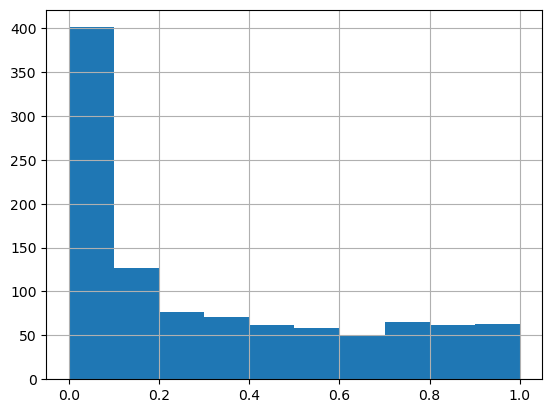

In [20]:
df_planets['norm_mass'].hist()